# IC50 Classification Using RA Models

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import csv
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state
from numpy import array
from sklearn import model_selection
%matplotlib notebook
# decision surface for logistic regression on a binary classification dataset
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

import warnings
warnings.filterwarnings('ignore')

#https://pub.towardsai.net/lasso-l1-vs-ridge-l2-vs-elastic-net-regularization-for-classification-model-409c3d86f6e9

In [3]:
text = []
y = []
with open('dataset.csv', encoding='latin1') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader: 
        if row and len(row[2]) > 10:
            text.append(str(row[2])) 
            y.append(int(row[8]))
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(text, y, test_size=0.2, random_state=10)

In [4]:
#2 classifications
"""
text_3rd = []
y_3rd = []
with open('3rd_renew.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader :
        if row and len(row[2]) > 10: 
            text_3rd.append(str(row[2])) 
            y_3rd.append(int(row[8]))
"""

saponin_3rd= []
saponin_y_3rd = []
with open('Saponins.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader :
        if row and len(row[2]) > 10: 
            saponin_3rd.append(str(row[2])) 
            saponin_y_3rd.append(int(row[8]))     

coumarin_3rd= []
coumarin_y_3rd = []
with open('Coumarin.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader :
        if row and len(row[2]) > 10: 
            coumarin_3rd.append(str(row[2])) 
            coumarin_y_3rd.append(int(row[8]))
            
flavonoid_3rd= []
flavonoid_y_3rd = []
with open('Flavonoid.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader :
        if row and len(row[2]) > 10: 
            flavonoid_3rd.append(str(row[2])) 
            flavonoid_y_3rd.append(int(row[8]))

In [6]:
#Use Logistic Classifier
tfidf = TfidfVectorizer(min_df=2) 
X_tfidf = tfidf.fit_transform(text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
saponin_3rd_tfidf = tfidf.transform(saponin_3rd)

clf1 = CalibratedClassifierCV(base_estimator= LogisticRegression(penalty='none', random_state=0), cv=5)

clf1.fit(X_train_tfidf, y_train)

y_probs_train= clf1.predict(X_train_tfidf)
y_probs_test= clf1.predict(X_test_tfidf)
saponin_y_probs_3rd= clf1.predict(saponin_3rd_tfidf)
y_probs=clf1.predict(X_tfidf)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(saponin_y_3rd))]
# predict probabilities
lr_probs = clf1.predict_proba(X_test_tfidf)
lr_probs_2 = clf1.predict_proba(X_train_tfidf)
lr_probs_3 = clf1.predict_proba(saponin_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(saponin_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(saponin_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(saponin_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(saponin_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='Logistic classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='Logistic classification_saponin_y_3rd_3rd, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("Logistic classification_saponin.png",dpi=600) 
#clear the plot
plt.clf()
# summarize scores
print('Logistic classification_test: ROC AUC=%.3f' % (lr_auc))
print('Logistic classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('Logistic classification_saponin_y_3rd: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf1.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf1.score(X_test_tfidf, y_test)))
print('Test 3rd set score: {:.3f}'.format(clf1.score(saponin_3rd_tfidf, saponin_y_3rd)))

"""
# 1.K-FOLD Cross Validation Classification Accuracy
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

scoring = 'accuracy'
results = model_selection.cross_val_score(clf1, X_tfidf, y, cv=kfold, scoring=scoring)
print('Accuracy', results.mean(), results.std())

#2. Logistic loss scoring = 'neg_log_loss'
scoring = 'neg_log_loss'
results4 = model_selection.cross_val_score(clf1, X_tfidf, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (-results4.mean(), results4.std()))
print('Logloss', -results4.mean(), results4.std())
#3. ROC
scoring = 'roc_auc'
results = model_selection.cross_val_score(clf1, X_tfidf, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
print('AUC', results.mean(), results.std())

#4. MCC
#https://github.com/MJeremy2017/BasicPredictionProcess/blob/master/credit_quiz.py
MCC = []
M = make_scorer(matthews_corrcoef)
mcc= model_selection.cross_val_score(clf1, X_tfidf, y, cv=kfold, scoring=M)
MCC.append(mcc)
x = array(MCC)
print(MCC)
print("MCC: %.3f (%.3f)" % (x.mean(), x.std()))
print('MCC', x.mean(), x.std())
"""

<IPython.core.display.Javascript object>

Logistic classification_test: ROC AUC=0.951
Logistic classification_training: ROC AUC=0.958
Logistic classification_saponin_y_3rd: ROC AUC=0.975
Train set score: 0.892
Test set score: 0.886
Test 3rd set score: 0.862


'\n# 1.K-FOLD Cross Validation Classification Accuracy\nkfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)\n\nscoring = \'accuracy\'\nresults = model_selection.cross_val_score(clf1, X_tfidf, y, cv=kfold, scoring=scoring)\nprint(\'Accuracy\', results.mean(), results.std())\n\n#2. Logistic loss scoring = \'neg_log_loss\'\nscoring = \'neg_log_loss\'\nresults4 = model_selection.cross_val_score(clf1, X_tfidf, y, cv=kfold, scoring=scoring)\nprint("Logloss: %.3f (%.3f)" % (-results4.mean(), results4.std()))\nprint(\'Logloss\', -results4.mean(), results4.std())\n#3. ROC\nscoring = \'roc_auc\'\nresults = model_selection.cross_val_score(clf1, X_tfidf, y, cv=kfold, scoring=scoring)\nprint("AUC: %.3f (%.3f)" % (results.mean(), results.std()))\nprint(\'AUC\', results.mean(), results.std())\n\n#4. MCC\n#https://github.com/MJeremy2017/BasicPredictionProcess/blob/master/credit_quiz.py\nMCC = []\nM = make_scorer(matthews_corrcoef)\nmcc= model_selection.cross_val_score(cl

In [8]:
print(X_tfidf)

  (0, 18)	0.1095650270399106
  (0, 980)	0.14277801789841868
  (0, 961)	0.12501969506102123
  (0, 960)	0.11522375694285825
  (0, 923)	0.1494743209267582
  (0, 912)	0.04372571641492379
  (0, 906)	0.15238659585514022
  (0, 901)	0.14852330411590275
  (0, 869)	0.14620976112823972
  (0, 822)	0.13425828294609982
  (0, 817)	0.06413470605695701
  (0, 798)	0.10204084858995946
  (0, 792)	0.110852138157195
  (0, 757)	0.14344856361573488
  (0, 733)	0.047342418729005284
  (0, 701)	0.11242522095113706
  (0, 689)	0.10099984385965599
  (0, 679)	0.07383535497488003
  (0, 659)	0.15506195571569872
  (0, 657)	0.1323484495257939
  (0, 646)	0.03837800695892049
  (0, 642)	0.11159583622820711
  (0, 639)	0.15728789455554665
  (0, 595)	0.04396959186309215
  (0, 593)	0.12090536406054757
  :	:
  (60274, 656)	0.03972846513768323
  (60274, 768)	0.11155381610914081
  (60274, 324)	0.035170272751415356
  (60274, 387)	0.14916636394878607
  (60274, 270)	0.13916807643831958
  (60274, 737)	0.08856828434919335
  (60274, 152

In [6]:
#Use Logistic Classifier
tfidf = TfidfVectorizer(min_df=2) 
X_tfidf = tfidf.fit_transform(text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
coumarin_3rd_tfidf = tfidf.transform(coumarin_3rd)

clf1 = CalibratedClassifierCV(base_estimator= LogisticRegression(penalty='none', random_state=0), cv=5)

clf1.fit(X_train_tfidf, y_train)

y_probs_train= clf1.predict(X_train_tfidf)
y_probs_test= clf1.predict(X_test_tfidf)
y_probs_3rd= clf1.predict(coumarin_3rd_tfidf)
y_probs=clf1.predict(X_tfidf)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(coumarin_y_3rd))]
# predict probabilities
lr_probs = clf1.predict_proba(X_test_tfidf)
lr_probs_2 = clf1.predict_proba(X_train_tfidf)
lr_probs_3 = clf1.predict_proba(coumarin_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(coumarin_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(coumarin_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(coumarin_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(coumarin_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='Logistic classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='Logistic classification_coumarin_3rd, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("Logistic classification_coumarin_3rd.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('Logistic classification_test: ROC AUC=%.3f' % (lr_auc))
print('Logistic classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('Logistic classification_3rd: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf1.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf1.score(X_test_tfidf, y_test)))
print('Test 3rd set score: {:.3f}'.format(clf1.score(coumarin_3rd_tfidf, coumarin_y_3rd)))

Logistic classification_test: ROC AUC=0.951
Logistic classification_training: ROC AUC=0.958
Logistic classification_3rd: ROC AUC=0.620
Train set score: 0.892
Test set score: 0.886
Test 3rd set score: 0.919


In [7]:
#Use Logistic Classifier
tfidf = TfidfVectorizer(min_df=2) 
X_tfidf = tfidf.fit_transform(text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
flavonoid_3rd_tfidf = tfidf.transform(flavonoid_3rd)

clf1 = CalibratedClassifierCV(base_estimator= LogisticRegression(penalty='none', random_state=0), cv=5)

clf1.fit(X_train_tfidf, y_train)

y_probs_train= clf1.predict(X_train_tfidf)
y_probs_test= clf1.predict(X_test_tfidf)
y_probs_3rd= clf1.predict(flavonoid_3rd_tfidf)
y_probs=clf1.predict(X_tfidf)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(flavonoid_y_3rd))]
# predict probabilities
lr_probs = clf1.predict_proba(X_test_tfidf)
lr_probs_2 = clf1.predict_proba(X_train_tfidf)
lr_probs_3 = clf1.predict_proba(flavonoid_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(flavonoid_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(flavonoid_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(flavonoid_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(flavonoid_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='Logistic classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='Logistic classification_flavonoid_3rd__3rd, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("Logistic classification_flavonoid_3rd_tfidf.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('Logistic classification_test: ROC AUC=%.3f' % (lr_auc))
print('Logistic classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('Logistic classification_3rd: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf1.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf1.score(X_test_tfidf, y_test)))
print('Test 3rd set score: {:.3f}'.format(clf1.score(flavonoid_3rd_tfidf, flavonoid_y_3rd)))

Logistic classification_test: ROC AUC=0.951
Logistic classification_training: ROC AUC=0.958
Logistic classification_3rd: ROC AUC=0.892
Train set score: 0.892
Test set score: 0.886
Test 3rd set score: 0.655


In [8]:
exp_series = pd.Series(y_train)
pred_series = pd.Series(clf1.predict(X_train_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,16805,2844,19649
1,2386,26185,28571
All,19191,29029,48220


In [9]:
exp_series = pd.Series(y_test)
pred_series = pd.Series(clf1.predict(X_test_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,4064,745,4809
1,634,6612,7246
All,4698,7357,12055


In [10]:
exp_series = pd.Series(saponin_y_3rd)
pred_series = pd.Series(clf1.predict(saponin_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,165,35,200
1,3,72,75
All,168,107,275


In [11]:
exp_series = pd.Series(coumarin_y_3rd)
pred_series = pd.Series(clf1.predict(coumarin_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,986,42,1028
1,45,1,46
All,1031,43,1074


In [12]:
exp_series = pd.Series(flavonoid_y_3rd)
pred_series = pd.Series(clf1.predict(flavonoid_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,77,3,80
1,164,240,404
All,241,243,484


In [17]:
from sklearn.linear_model import RidgeClassifier

clf2 = CalibratedClassifierCV(base_estimator= RidgeClassifier(alpha = 1), cv=5)
clf2.fit(X_train_tfidf, y_train)

X_tfidf = tfidf.fit_transform(text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
saponin_3rd_tfidf = tfidf.transform(saponin_3rd)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

y_probs_train= clf2.predict(X_train_tfidf)
y_probs_test= clf2.predict(X_test_tfidf)
y_probs_3rd= clf2.predict(saponin_3rd_tfidf)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(saponin_y_3rd))]
# predict probabilities
lr_probs = clf2.predict_proba(X_test_tfidf)
lr_probs_2 = clf2.predict_proba(X_train_tfidf)
lr_probs_3 = clf2.predict_proba(saponin_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(saponin_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(saponin_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(saponin_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(saponin_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Ridge classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='Ridge classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='Ridge classification_saponin_3rd, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("Ridge classification_saponin.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('Ridge classification_test: ROC AUC=%.3f' % (lr_auc))
print('Ridge classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('Ridge classification_saponin_3rd: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf2.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf2.score(X_test_tfidf, y_test)))
print('Test_saponin_3rd set score: {:.3f}'.format(clf2.score(saponin_3rd_tfidf, saponin_y_3rd)))

Ridge classification_test: ROC AUC=0.948
Ridge classification_training: ROC AUC=0.954
Ridge classification_saponin_3rd: ROC AUC=0.967
Train set score: 0.888
Test set score: 0.884
Test_saponin_3rd set score: 0.847


In [18]:
#Coumarin
clf2 = CalibratedClassifierCV(base_estimator= RidgeClassifier(alpha = 1), cv=5)
clf2.fit(X_train_tfidf, y_train)

X_tfidf = tfidf.fit_transform(text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
coumarin_3rd_tfidf = tfidf.transform(coumarin_3rd)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

y_probs_train= clf2.predict(X_train_tfidf)
y_probs_test= clf2.predict(X_test_tfidf)
y_probs_3rd= clf2.predict(coumarin_3rd_tfidf)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(coumarin_y_3rd))]
# predict probabilities
lr_probs = clf2.predict_proba(X_test_tfidf)
lr_probs_2 = clf2.predict_proba(X_train_tfidf)
lr_probs_3 = clf2.predict_proba(coumarin_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(coumarin_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(coumarin_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(coumarin_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(coumarin_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Ridge classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='Ridge classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='Ridge classification_coumarin_3rd, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("Ridge classification_coumarin.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('Ridge classification_test: ROC AUC=%.3f' % (lr_auc))
print('Ridge classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('Ridge classification_coumarin_3rd: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf2.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf2.score(X_test_tfidf, y_test)))
print('Test_coumarin_3rd set score: {:.3f}'.format(clf2.score(coumarin_3rd_tfidf, coumarin_y_3rd)))

Ridge classification_test: ROC AUC=0.948
Ridge classification_training: ROC AUC=0.954
Ridge classification_coumarin_3rd: ROC AUC=0.687
Train set score: 0.888
Test set score: 0.884
Test_coumarin_3rd set score: 0.930


In [19]:
#Flavonoid
clf2 = CalibratedClassifierCV(base_estimator= RidgeClassifier(alpha = 1), cv=5)
clf2.fit(X_train_tfidf, y_train)

X_tfidf = tfidf.fit_transform(text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
flavonoid_3rd_tfidf = tfidf.transform(flavonoid_3rd)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

y_probs_train= clf2.predict(X_train_tfidf)
y_probs_test= clf2.predict(X_test_tfidf)
y_probs_3rd= clf2.predict(flavonoid_3rd_tfidf)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(flavonoid_y_3rd))]
# predict probabilities
lr_probs = clf2.predict_proba(X_test_tfidf)
lr_probs_2 = clf2.predict_proba(X_train_tfidf)
lr_probs_3 = clf2.predict_proba(flavonoid_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(flavonoid_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(flavonoid_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(flavonoid_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(flavonoid_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Ridge classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='Ridge classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='Ridge classification_flavonoid_3rd, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("Ridge classification_flavonoid.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('Ridge classification_test: ROC AUC=%.3f' % (lr_auc))
print('Ridge classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('Ridge classification_flavonoid: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf2.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf2.score(X_test_tfidf, y_test)))
print('Test_flavonoid_3rd set score: {:.3f}'.format(clf2.score(flavonoid_3rd_tfidf, flavonoid_y_3rd)))

Ridge classification_test: ROC AUC=0.948
Ridge classification_training: ROC AUC=0.954
Ridge classification_flavonoid: ROC AUC=0.817
Train set score: 0.888
Test set score: 0.884
Test_flavonoid_3rd set score: 0.634


In [20]:
exp_series = pd.Series(y_train)
pred_series = pd.Series(clf2.predict(X_train_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,16694,2955,19649
1,2425,26146,28571
All,19119,29101,48220


In [21]:
exp_series = pd.Series(y_test)
pred_series = pd.Series(clf2.predict(X_test_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,4050,759,4809
1,637,6609,7246
All,4687,7368,12055


In [22]:
exp_series = pd.Series(saponin_y_3rd)
pred_series = pd.Series(clf2.predict(saponin_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,163,37,200
1,5,70,75
All,168,107,275


In [23]:
exp_series = pd.Series(coumarin_y_3rd)
pred_series = pd.Series(clf2.predict(coumarin_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,991,37,1028
1,38,8,46
All,1029,45,1074


In [24]:
exp_series = pd.Series(flavonoid_y_3rd)
pred_series = pd.Series(clf2.predict(flavonoid_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,66,14,80
1,163,241,404
All,229,255,484


In [29]:
#Use LASSO Classifier
from sklearn.linear_model import LogisticRegression
X_tfidf = tfidf.fit_transform(text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
saponin_3rd_tfidf = tfidf.transform(saponin_3rd)

clf3 = CalibratedClassifierCV(base_estimator= LogisticRegression(penalty='l1', solver='liblinear'), cv=5)
clf3.fit(X_train_tfidf, y_train)

y_probs_train= clf3.predict(X_train_tfidf)
y_probs_test= clf3.predict(X_test_tfidf)
y_probs_3rd= clf3.predict(saponin_3rd_tfidf)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(saponin_y_3rd))]
# predict probabilities
lr_probs = clf3.predict_proba(X_test_tfidf)
lr_probs_2 = clf3.predict_proba(X_train_tfidf)
lr_probs_3 = clf3.predict_proba(saponin_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(saponin_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(saponin_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(saponin_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(saponin_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LASSO classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='LASSO classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='LASSO classification_saponin, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("LASSO classification_saponin.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('LASSO classification_test: ROC AUC=%.3f' % (lr_auc))
print('LASSO classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('LASSO classification_saponin: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf3.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf3.score(X_test_tfidf, y_test)))
print('Test 3rd set score: {:.3f}'.format(clf3.score(saponin_3rd_tfidf, saponin_y_3rd)))

LASSO classification_test: ROC AUC=0.950
LASSO classification_training: ROC AUC=0.956
LASSO classification_saponin: ROC AUC=0.975
Train set score: 0.890
Test set score: 0.885
Test 3rd set score: 0.862


In [30]:
#Use LASSO Classifier:coumarin

X_tfidf = tfidf.fit_transform(text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
coumarin_3rd_tfidf = tfidf.transform(coumarin_3rd)

clf3 = CalibratedClassifierCV(base_estimator= LogisticRegression(penalty='l1', solver='liblinear'), cv=5)
clf3.fit(X_train_tfidf, y_train)

y_probs_train= clf3.predict(X_train_tfidf)
y_probs_test= clf3.predict(X_test_tfidf)
y_probs_3rd= clf3.predict(coumarin_3rd_tfidf)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(coumarin_y_3rd))]
# predict probabilities
lr_probs = clf3.predict_proba(X_test_tfidf)
lr_probs_2 = clf3.predict_proba(X_train_tfidf)
lr_probs_3 = clf3.predict_proba(coumarin_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(coumarin_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(coumarin_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(coumarin_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(coumarin_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LASSO classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='LASSO classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='LASSO classification_coumarin, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("LASSO classification_coumarin.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('LASSO classification_test: ROC AUC=%.3f' % (lr_auc))
print('LASSO classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('LASSO classification_coumarin: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf3.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf3.score(X_test_tfidf, y_test)))
print('Coumarin 3rd set score: {:.3f}'.format(clf3.score(coumarin_3rd_tfidf, coumarin_y_3rd)))

LASSO classification_test: ROC AUC=0.950
LASSO classification_training: ROC AUC=0.956
LASSO classification_coumarin: ROC AUC=0.691
Train set score: 0.890
Test set score: 0.885
Coumarin 3rd set score: 0.931


In [31]:
#Use LASSO Classifier:Flavonoid
from sklearn.linear_model import LogisticRegression
X_tfidf = tfidf.fit_transform(text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
flavonoid_3rd_tfidf = tfidf.transform(flavonoid_3rd)

clf3 = CalibratedClassifierCV(base_estimator= LogisticRegression(penalty='l1', solver='liblinear'), cv=5)
clf3.fit(X_train_tfidf, y_train)

y_probs_train= clf3.predict(X_train_tfidf)
y_probs_test= clf3.predict(X_test_tfidf)
y_probs_3rd= clf3.predict(flavonoid_3rd_tfidf)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(flavonoid_y_3rd))]
# predict probabilities
lr_probs = clf3.predict_proba(X_test_tfidf)
lr_probs_2 = clf3.predict_proba(X_train_tfidf)
lr_probs_3 = clf3.predict_proba(flavonoid_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(flavonoid_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(flavonoid_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(flavonoid_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(flavonoid_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LASSO classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='LASSO classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='LASSO classification_flavonoid, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("LASSO classification_flavonoid.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('LASSO classification_test: ROC AUC=%.3f' % (lr_auc))
print('LASSO classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('LASSO classification_flavonoid: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf3.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf3.score(X_test_tfidf, y_test)))
print('Flavonoid score: {:.3f}'.format(clf3.score(flavonoid_3rd_tfidf, flavonoid_y_3rd)))

LASSO classification_test: ROC AUC=0.950
LASSO classification_training: ROC AUC=0.956
LASSO classification_flavonoid: ROC AUC=0.867
Train set score: 0.890
Test set score: 0.885
Flavonoid score: 0.643


In [36]:
exp_series = pd.Series(y_train)
pred_series = pd.Series(clf3.predict(X_train_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,16773,2876,19649
1,2413,26158,28571
All,19186,29034,48220


In [37]:
exp_series = pd.Series(y_test)
pred_series = pd.Series(clf3.predict(X_test_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,4056,753,4809
1,633,6613,7246
All,4689,7366,12055


In [38]:
exp_series = pd.Series(saponin_y_3rd)
pred_series = pd.Series(clf3.predict(saponin_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,165,35,200
1,3,72,75
All,168,107,275


In [39]:
exp_series = pd.Series(coumarin_y_3rd)
pred_series = pd.Series(clf3.predict(coumarin_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,992,36,1028
1,38,8,46
All,1030,44,1074


In [40]:
exp_series = pd.Series(flavonoid_y_3rd)
pred_series = pd.Series(clf3.predict(flavonoid_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,74,6,80
1,167,237,404
All,241,243,484


In [41]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_train_tfidf = X_train_tfidf.todense()
X_train_tfidf= np.array(X_train_tfidf)

X_test_tfidf = tfidf.transform(X_test)
X_test_tfidf = X_test_tfidf.todense()
X_test_tfidf= np.array(X_test_tfidf)

saponin_3rd_tfidf = tfidf.transform(saponin_3rd)
saponin_3rd_tfidf = saponin_3rd_tfidf.todense()
saponin_3rd_tfidf= np.array(saponin_3rd_tfidf)

flavonoid_3rd_tfidf = tfidf.transform(flavonoid_3rd)
flavonoid_3rd_tfidf = flavonoid_3rd_tfidf.todense()
flavonoid_3rd_tfidf= np.array(flavonoid_3rd_tfidf)

coumarin_3rd_tfidf =  tfidf.transform(coumarin_3rd)
coumarin_3rd_tfidf = coumarin_3rd_tfidf.todense()
coumarin_3rd_tfidf= np.array(coumarin_3rd_tfidf)


In [42]:
from sklearn.naive_bayes import GaussianNB

clf4 = CalibratedClassifierCV(base_estimator= GaussianNB(), cv=5)
clf4.fit(X_train_tfidf, y_train)

y_probs_train= clf4.predict(X_train_tfidf)
y_probs_test= clf4.predict(X_test_tfidf)
y_probs_3rd= clf4.predict(saponin_3rd_tfidf)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(saponin_y_3rd))]
# predict probabilities
lr_probs = clf4.predict_proba(X_test_tfidf)
lr_probs_2 = clf4.predict_proba(X_train_tfidf)
lr_probs_3 = clf4.predict_proba(saponin_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(saponin_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(saponin_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(saponin_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(saponin_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive_bayes classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='Naive_bayes classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='Naive_bayes classification_saponin, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("Naive_bayes classification_saponin.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('Naive_bayes classification_test: ROC AUC=%.3f' % (lr_auc))
print('Naive_bayes classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('Naive_bayes classification_saponin: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf4.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf4.score(X_test_tfidf, y_test)))
print('saponin score: {:.3f}'.format(clf4.score(saponin_3rd_tfidf, saponin_y_3rd)))

Naive_bayes classification_test: ROC AUC=0.861
Naive_bayes classification_training: ROC AUC=0.865
Naive_bayes classification_saponin: ROC AUC=0.861
Train set score: 0.787
Test set score: 0.779
saponin score: 0.822


In [43]:
clf4 = CalibratedClassifierCV(base_estimator= GaussianNB(), cv=5)
clf4.fit(X_train_tfidf, y_train)

y_probs_train= clf4.predict(X_train_tfidf)
y_probs_test= clf4.predict(X_test_tfidf)
y_probs_3rd= clf4.predict(flavonoid_3rd_tfidf)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(flavonoid_3rd_tfidf))]
# predict probabilities
lr_probs = clf4.predict_proba(X_test_tfidf)
lr_probs_2 = clf4.predict_proba(X_train_tfidf)
lr_probs_3 = clf4.predict_proba(flavonoid_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(flavonoid_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(flavonoid_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(flavonoid_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(flavonoid_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive_bayes classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='Naive_bayes classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='Naive_bayes classification_flavonoid, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("Naive_bayes classification_flavonoid.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('Naive_bayes classification_test: ROC AUC=%.3f' % (lr_auc))
print('Naive_bayes classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('Naive_bayes classification_flavonoid: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf4.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf4.score(X_test_tfidf, y_test)))
print('flavonoid score: {:.3f}'.format(clf4.score(flavonoid_3rd_tfidf, flavonoid_y_3rd)))

Naive_bayes classification_test: ROC AUC=0.861
Naive_bayes classification_training: ROC AUC=0.865
Naive_bayes classification_flavonoid: ROC AUC=0.718
Train set score: 0.787
Test set score: 0.779
flavonoid score: 0.593


In [44]:
clf4 = CalibratedClassifierCV(base_estimator= GaussianNB(), cv=5)
clf4.fit(X_train_tfidf, y_train)

y_probs_train= clf4.predict(X_train_tfidf)
y_probs_test= clf4.predict(X_test_tfidf)
y_probs_3rd= clf4.predict(coumarin_3rd_tfidf)

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_probs_2 = [0 for _ in range(len(y_train))]
ns_probs_3 = [0 for _ in range(len(coumarin_y_3rd))]
# predict probabilities
lr_probs = clf4.predict_proba(X_test_tfidf)
lr_probs_2 = clf4.predict_proba(X_train_tfidf)
lr_probs_3 = clf4.predict_proba(coumarin_3rd_tfidf)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_2 = lr_probs_2[:, 1]
lr_probs_3 = lr_probs_3[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  
ns_fpr_2, ns_tpr_2, _ = roc_curve(y_train, ns_probs_2)
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_train, lr_probs_2)

ns_fpr_3, ns_tpr_3, _ = roc_curve(coumarin_y_3rd, ns_probs_3)
lr_fpr_3, lr_tpr_3, _ = roc_curve(coumarin_y_3rd, lr_probs_3)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
    
ns_auc_2 = roc_auc_score(y_train, ns_probs_2)
lr_auc_2 = roc_auc_score(y_train, lr_probs_2)

ns_auc_3 = roc_auc_score(coumarin_y_3rd, ns_probs_3)
lr_auc_3 = roc_auc_score(coumarin_y_3rd, lr_probs_3)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive_bayes classification_Test, AUC=%.3f' % (lr_auc))
plt.plot(lr_fpr_2, lr_tpr_2, color='green', marker='.', label='Naive_bayes classification_Training, AUC=%.3f' % (lr_auc_2))
plt.plot(lr_fpr_3, lr_tpr_3, color='red', marker='.', label='Naive_bayes classification_coumarin, AUC=%.3f' % (lr_auc_3))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legendLogistic
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
# show the plot
plt.savefig("Naive_bayes classification_coumarin.png",dpi=300) 
#clear the plot
plt.clf()
# summarize scores
print('Naive_bayes classification_test: ROC AUC=%.3f' % (lr_auc))
print('Naive_bayes classification_training: ROC AUC=%.3f' % (lr_auc_2))
print('Naive_bayes classification_coumarin: ROC AUC=%.3f' % (lr_auc_3))

print('Train set score: {:.3f}'.format(clf4.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(clf4.score(X_test_tfidf, y_test)))
print('coumarin score: {:.3f}'.format(clf4.score(coumarin_3rd_tfidf, coumarin_y_3rd)))

Naive_bayes classification_test: ROC AUC=0.861
Naive_bayes classification_training: ROC AUC=0.865
Naive_bayes classification_coumarin: ROC AUC=0.633
Train set score: 0.787
Test set score: 0.779
coumarin score: 0.807


In [45]:
exp_series = pd.Series(saponin_y_3rd)
pred_series = pd.Series(clf4.predict(saponin_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,197,3,200
1,46,29,75
All,243,32,275


In [46]:
exp_series = pd.Series(flavonoid_y_3rd)
pred_series = pd.Series(clf4.predict(flavonoid_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,59,21,80
1,176,228,404
All,235,249,484


In [47]:
exp_series = pd.Series(coumarin_y_3rd)
pred_series = pd.Series(clf4.predict(coumarin_3rd_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,855,173,1028
1,34,12,46
All,889,185,1074


In [48]:
exp_series = pd.Series(y_train)
pred_series = pd.Series(clf4.predict(X_train_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,15566,4083,19649
1,6186,22385,28571
All,21752,26468,48220


In [49]:
exp_series = pd.Series(y_test)
pred_series = pd.Series(clf4.predict(X_test_tfidf))
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,3767,1042,4809
1,1617,5629,7246
All,5384,6671,12055


(275, 2)
(275,)


<IPython.core.display.Javascript object>


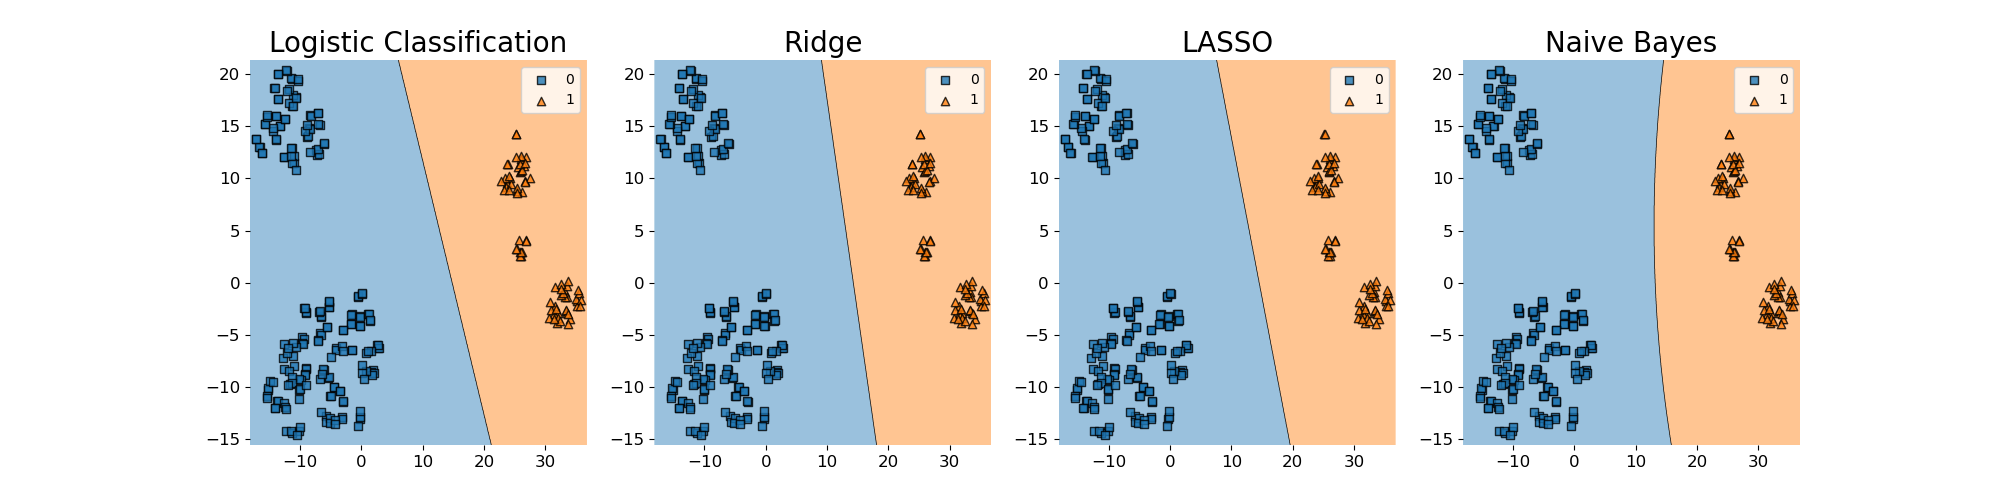

In [97]:
#3rd set:saponin
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

X_=TSNE(n_components=2, random_state=0).fit_transform(saponin_3rd_tfidf)
X=np.asarray(X_, dtype=float)
y_3rd=np.asarray((saponin_y_3rd), dtype=int)

print(X.shape)
print(y_3rd.shape)

fig = plt.figure(figsize=(20, 5))  # Set the figure size to be 1x4

labels = ['Logistic Classification', 'Ridge', 'LASSO', 'Naive Bayes']

for clf, lab, i in zip([clf1, clf2, clf3, clf4], labels, range(4)):
    clf.fit(X, y_3rd)
    ax = plt.subplot(1, 4, i+1)  # Use subplot to create a 1x4 grid
    plot_decision_regions(X=X, y=y_3rd, clf=clf, legend=2)
    plt.legend(loc='best')
    plt.title(lab, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=12)  # Increase the font size of the tick labels
    plt.title(lab, fontsize=20)

    plt.draw()
plt.savefig("Decision regions-saponin.png",dpi=600) 

(1074, 2)
(1074,)


<IPython.core.display.Javascript object>


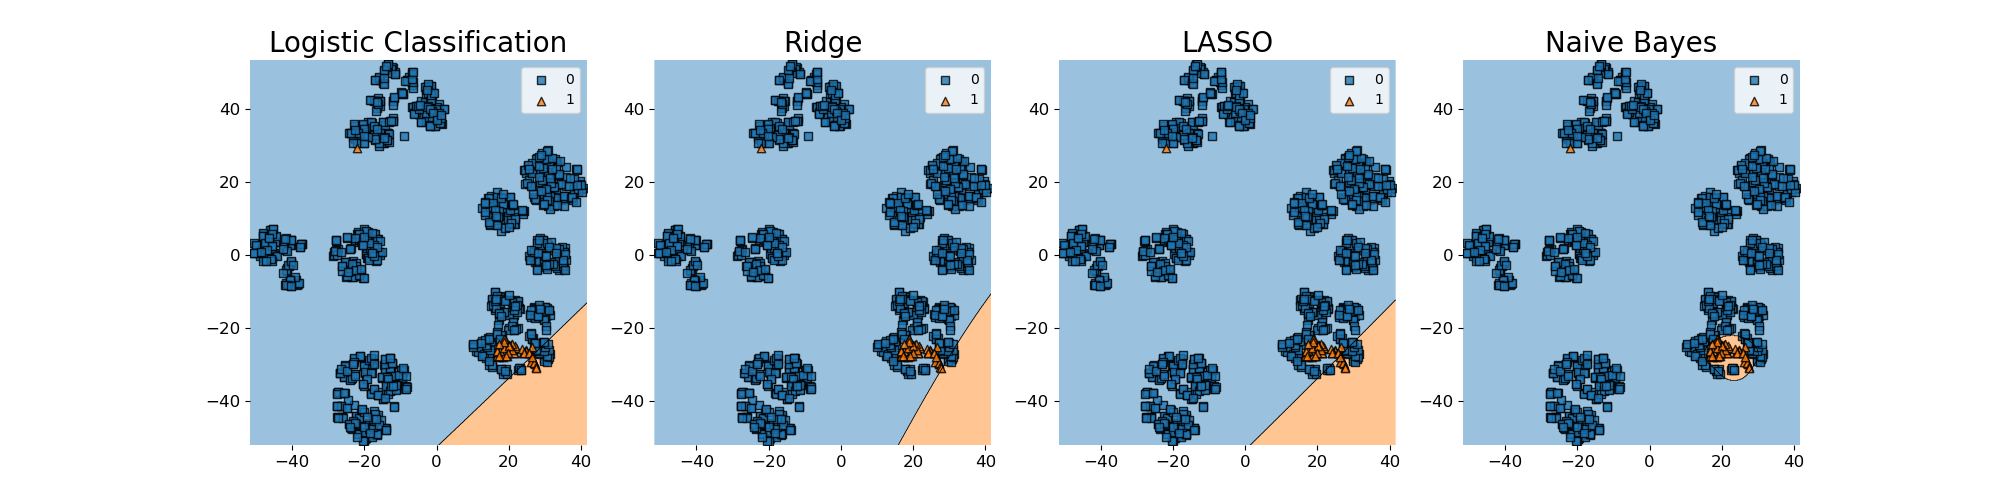

In [98]:
X_ = TSNE(n_components=2, random_state=0).fit_transform(coumarin_3rd_tfidf)
X = np.asarray(X_, dtype=float)
y_3rd = np.asarray(coumarin_y_3rd, dtype=int)

print(X.shape)
print(y_3rd.shape)

fig = plt.figure(figsize=(20, 5))  # Set the figure size to be 1x4

labels = ['Logistic Classification', 'Ridge', 'LASSO', 'Naive Bayes']
for clf, lab, i in zip([clf1, clf2, clf3, clf4], labels, range(4)):
    clf.fit(X, y_3rd)
    ax = plt.subplot(1, 4, i+1)  # Use subplot to create a 1x4 grid
    plot_decision_regions(X=X, y=y_3rd, clf=clf, legend=5)
    plt.title(lab, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=12)  # Increase the font size of the tick labels
    plt.legend(loc='best')
    plt.title(lab, fontsize=20)

plt.draw()
plt.savefig("Decision regions-coumarin.png", dpi=600)


(484, 2)
(484,)


<IPython.core.display.Javascript object>


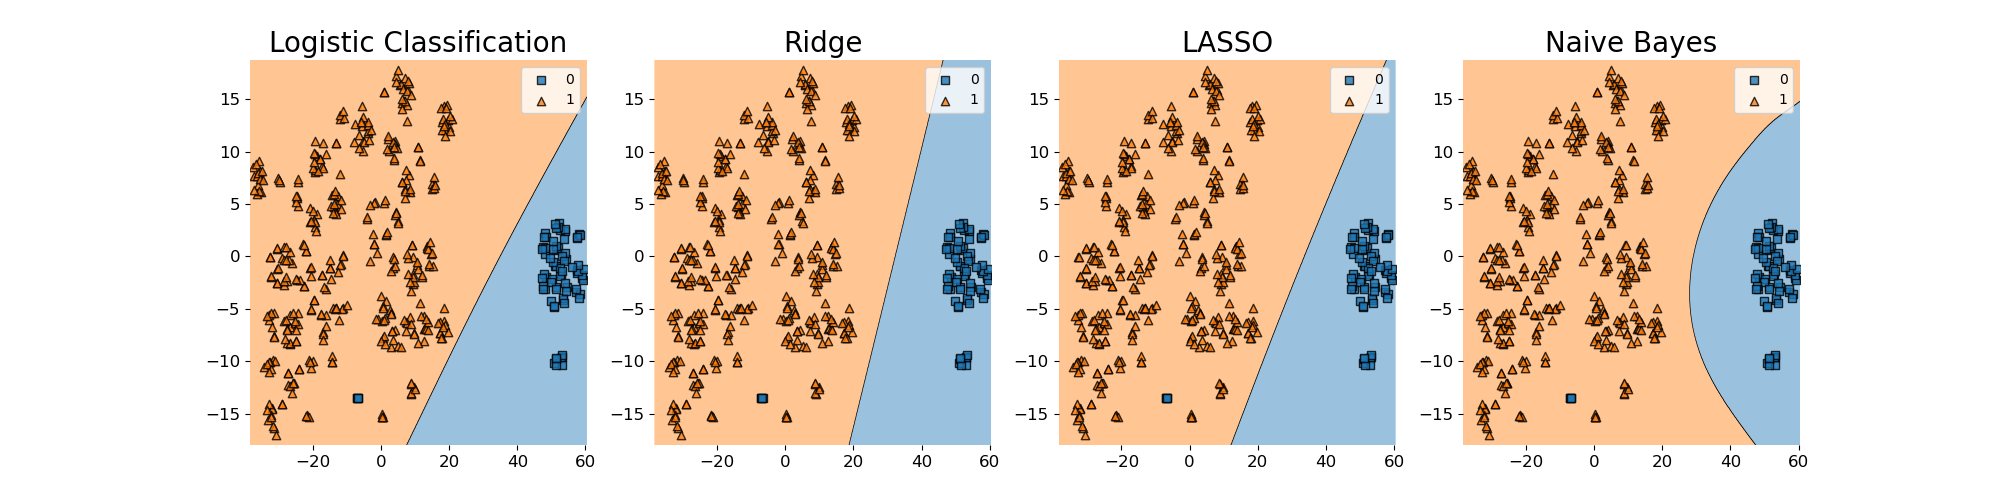

In [101]:
#3rd set:Flavonoid

X_=TSNE(n_components=2, random_state=0).fit_transform(flavonoid_3rd_tfidf)
X=np.asarray(X_, dtype=float)
y_3rd=np.asarray((flavonoid_y_3rd), dtype=int)

print(X.shape)
print(y_3rd.shape)

fig = plt.figure(figsize=(20, 5))  # Set the figure size to be 1x4

labels = ['Logistic Classification', 'Ridge', 'LASSO', 'Naive Bayes']
for clf, lab, i in zip([clf1, clf2, clf3, clf4], labels, range(4)):
    clf.fit(X, y_3rd)
    ax = plt.subplot(1, 4, i+1)  # Use subplot to create a 1x4 grid
    plot_decision_regions(X=X, y=y_3rd, clf=clf, legend=2)
    plt.title(lab, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=12)  # Increase the font size of the tick labels
    plt.legend(loc='best')
    plt.title(lab, fontsize=20)

plt.draw()
plt.savefig("Decision regions-flavonoid.png",dpi=600) 

In [100]:
    ax = plt.subplot(1, 4, i+1)  # Use subplot to create a 1x4 grid
    plot_decision_regions(X=X, y=y_3rd, clf=clf, legend=2)
    plt.title(lab, fontsize=20)  # Increase the font size for the title
    plt.tick_params(axis='both', which='major', labelsize=12)  # Increase the font size of the tick labels
    plt.legend(loc='best')
    plt.title(lab, fontsize=20)  

Text(0.5, 1.0, 'Naive Bayes')